In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [13, 8] #default figure size

In [167]:
df = pd.read_csv('Performance left join jockey and trainers and horse infor (1).csv', parse_dates = ['date', 'finish_time','H_arr_date'])

In [8]:
df.head()

,Unnamed: 0,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,...,H_no_of_starts_in_past10,H_curr_location,H_arr_date,H_trainer,H_owner,H_curr_rating,H_1920rating,H_sire,H_dam,H_damSire
0,0,1,1,2019-09-01,1,C127,3,GOOD RUNNERS WAY,Z Purton,C S Shum,...,0.0,Conghua,2020-03-04,C S Shum,Mr & Mrs Peter Chan On Tak and Robert Chan Chi...,34.0,34.0,Battle Paint,Ysa Post,Postponed
1,1,1,1,2019-09-01,2,C035,4,REGENCY GEM,J Moreira,W Y So,...,0.0,Hong Kong,2020-07-02,W Y So,Wendy Wong Yin Ting & Owen Cheng Ho Wang,40.0,40.0,Showcasing,The Myth,Cape Cross
2,2,1,1,2019-09-01,3,V406,7,PROUD SKY,K Teetan,L Ho,...,0.0,Hong Kong,2016-06-25,L Ho,Francis Wong Shing Yick & Raymond Wong Kai Yuen,24.0,24.0,Acclamation,Claiomh Solais,Galileo
3,3,1,1,2019-09-01,4,V369,2,LE PANACHE,A Sanna,D J Whyte,...,0.0,NaN,NaT,NaN,Kok Jian Pei,NaN,38.0,Acclamation,Heavens Peak,Pivotal
4,4,1,1,2019-09-01,5,V400,1,GOLD VELVET,L Hewitson,A T Millard,...,0.0,NaN,NaT,NaN,"Gibson Lau Wai Chi, Eric Lau Pui Kit & Ricky L...",NaN,42.0,Savabeel,Girls On Top,O'Reilly


In [9]:
df.columns

Index(['Unnamed: 0', 'race_id', 'race', 'date', 'place', 'horse_id',
       'horse_no', 'horse', 'jockey', 'trainer', 'actual_weight',
       'declared_horse_weight', 'draw', 'lbw', 'running_position', 'win_odds',
       'class', 'going', 'track', 'prize', 'location', 'distance_m',
       'finish_time', 'finish_time_s', 'J_Win', 'J_Win_perc', 'J_2nd',
       'J_2nd_perc', 'J_3rd', 'J_3rd_perc', 'J_4th', 'J_4th_perc', 'J_5th',
       'J_5th_perc', 'J_ttl_rides', 'J_stakes_won', 'T_Win', 'T_Win_perc',
       'T_2nd', 'T_2nd_perc', 'T_3rd', 'T_3rd_perc', 'T_4th', 'T_4th_perc',
       'T_5th', 'T_5th_perc', 'T_ttl_runs', 'T_stakes_won', 'H_id', 'H_name',
       'H_country', 'H_age', 'H_colour', 'H_sex', 'H_ImportType',
       'H_season_stakes', 'H_ttl_stakes', 'H_no_of_1_2_3_Starts',
       'H_no_of_starts_in_past10', 'H_curr_location', 'H_arr_date',
       'H_trainer', 'H_owner', 'H_curr_rating', 'H_1920rating', 'H_sire',
       'H_dam', 'H_damSire'],
      dtype='object')

In [119]:
df['H_country'].value_counts()

AUS    5127
NZ     2427
IRE    1148
GB      652
FR      246
SAF     189
USA     124
GER      81
JPN      42
BRZ      42
SPA       9
ITY       7
ARG       5
CHI       1
Name: H_country, dtype: int64

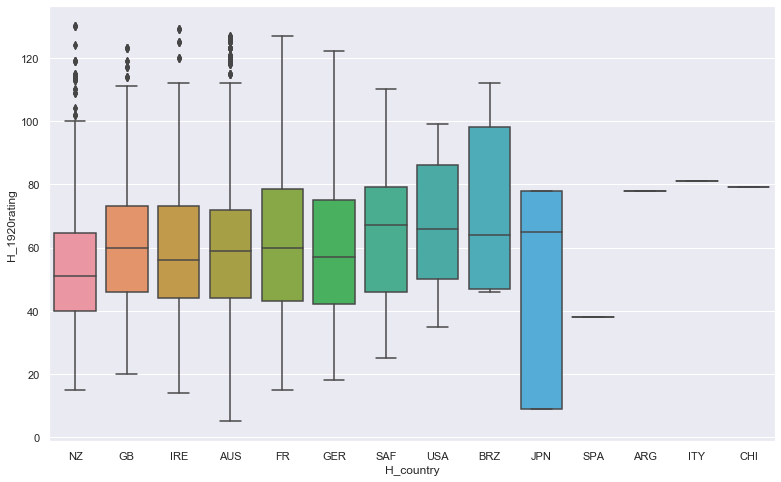

In [22]:
sns.boxplot(data=df,y='H_1920rating',x='H_country')

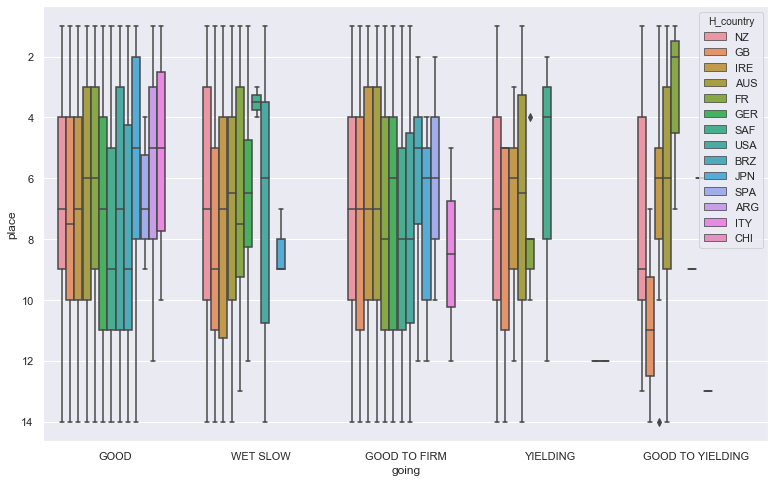

In [106]:
sns.boxplot(data=df,y='place',x='going',hue='H_country').invert_yaxis()

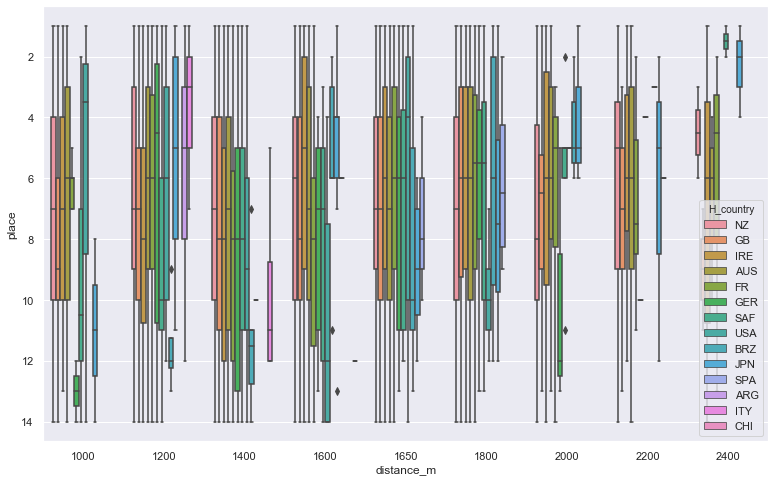

In [109]:
sns.boxplot(data=df,y='place',x='distance_m',hue='H_country').invert_yaxis()

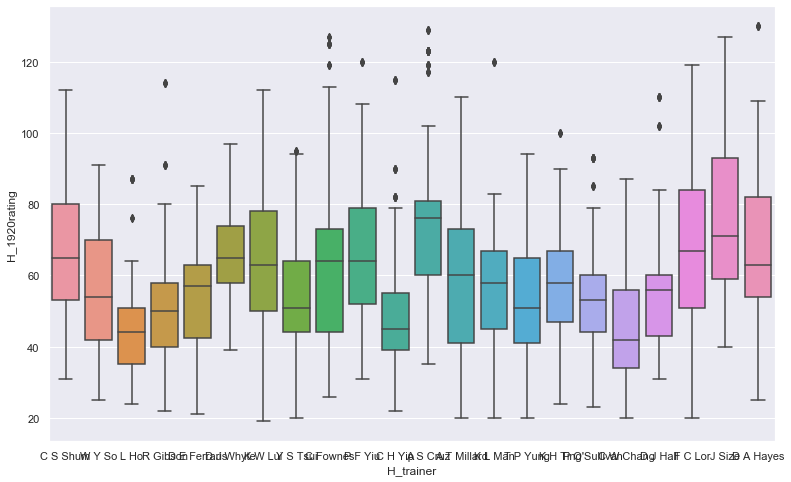

In [28]:
figsize=(20,50)
sns.boxplot(data=df,y='H_1920rating',x='H_trainer')

In [168]:
df=df.sort_values(by='date')

In [169]:
df['diff'] = df.groupby(['horse'])['date'].apply(lambda x: x.diff()).dt.days

In [153]:
df.shape

(10100, 69)

In [170]:
df['changeplace'] = df.groupby(['horse'])['place'].apply(lambda x: x.diff())

In [172]:
df.sort_values(by=['horse','date'])

,Unnamed: 0,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,...,H_arr_date,H_trainer,H_owner,H_curr_rating,H_1920rating,H_sire,H_dam,H_damSire,diff,changeplace
1088,1088,91,5,2019-10-12,3,B345,13,ABOVE,K Teetan,J Moore,...,2020-07-23,A T Millard,Mr & Mrs Paul Kan Man Lok,65.0,65.0,Tavistock,Once More,Thorn Park,NaN,NaN
1501,1501,125,2,2019-10-27,3,B345,9,ABOVE,J Moreira,J Moore,...,2020-07-23,A T Millard,Mr & Mrs Paul Kan Man Lok,65.0,65.0,Tavistock,Once More,Thorn Park,15.0,0.0
2068,2068,171,2,2019-11-17,1,B345,12,ABOVE,J Moreira,J Moore,...,2020-07-23,A T Millard,Mr & Mrs Paul Kan Man Lok,65.0,65.0,Tavistock,Once More,Thorn Park,21.0,-2.0
2454,2454,202,4,2019-11-27,1,B345,6,ABOVE,S de Sousa,J Moore,...,2020-07-23,A T Millard,Mr & Mrs Paul Kan Man Lok,65.0,65.0,Tavistock,Once More,Thorn Park,10.0,0.0
3303,3303,270,6,2019-12-21,6,B345,6,ABOVE,B Shinn,J Moore,...,2020-07-23,A T Millard,Mr & Mrs Paul Kan Man Lok,65.0,65.0,Tavistock,Once More,Thorn Park,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,5713,462,9,2020-03-01,4,B406,11,ZHAN JIANG ROCKS,K C Leung,W Y So,...,2020-07-01,W Y So,Zhan Jiang Syndicate,58.0,58.0,Big Bad Bob,Rupa,Acclamation,18.0,0.0
6135,6135,496,6,2020-03-14,9,B406,12,ZHAN JIANG ROCKS,M L Yeung,W Y So,...,2020-07-01,W Y So,Zhan Jiang Syndicate,58.0,58.0,Big Bad Bob,Rupa,Acclamation,13.0,5.0
6617,6617,534,8,2020-03-29,7,B406,14,ZHAN JIANG ROCKS,K Teetan,W Y So,...,2020-07-01,W Y So,Zhan Jiang Syndicate,58.0,58.0,Big Bad Bob,Rupa,Acclamation,15.0,-2.0
7894,7894,639,8,2020-05-06,10,B406,8,ZHAN JIANG ROCKS,H W Lai,W Y So,...,2020-07-01,W Y So,Zhan Jiang Syndicate,58.0,58.0,Big Bad Bob,Rupa,Acclamation,38.0,3.0


In [173]:
res = df.dropna(thresh=69)

In [174]:
res

,Unnamed: 0,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,...,H_arr_date,H_trainer,H_owner,H_curr_rating,H_1920rating,H_sire,H_dam,H_damSire,diff,changeplace
287,287,25,5,2019-09-11,9,C314,1,ALLIED AGILITY,B Shinn,P F Yiu,...,2020-09-09,P F Yiu,"Chan Kwok Yuen, Man Pui Kwan, Cho Kim Fu & Dan...",82.0,79.0,Star Witness,Spooked,Scaredee Cat,10.0,0.0
281,281,25,5,2019-09-11,3,B332,8,WINNING WAYS,K Teetan,A T Millard,...,2019-05-13,C S Shum,Henry Cheng Kar Shun,45.0,45.0,Lope de Vega,Sahara Sky,Danehill,10.0,-5.0
245,245,21,1,2019-09-11,7,B460,3,ROYAL RACER,J Moreira,C Fownes,...,2020-08-27,C Fownes,Thomas Yeung Chuen Chow,39.0,39.0,Dreamscape,Ice Cold Crownie,Beautiful Crown,10.0,-3.0
260,260,23,3,2019-09-11,3,C251,5,SKY GEM,J Moreira,C Fownes,...,2020-06-25,C Fownes,"Kwan Kin Man, Dora Kwan Man Ting & Bryan Kwan ...",39.0,39.0,Niagara,Montjeu Way,Montjeu,10.0,-6.0
262,262,23,3,2019-09-11,5,A083,1,CURLING LUXURY,B Shinn,Y S Tsui,...,2020-06-24,Y S Tsui,Dickman Chan Lap Tat,45.0,45.0,O'Reilly,Former Glory,Dynaformer,10.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,10004,812,4,2020-07-12,7,C073,5,NORTHERN SUPERSTAR,C Schofield,A T Millard,...,2018-08-18,A T Millard,Edmond Yue Kwok Yin,89.0,92.0,Count Dubois,Pagan Dance,Jet Master,21.0,2.0
10005,10005,812,4,2020-07-12,8,C071,6,KINGS SHIELD,K C Leung,F C Lor,...,2020-01-24,F C Lor,Siu Pak Kwan,99.0,99.0,Scat Daddy,Gender Dance,Miesque's Son,18.0,-4.0
10006,10006,813,5,2020-07-12,1,C461,7,NATURAL STORM,C Schofield,P F Yiu,...,2020-02-07,P F Yiu,Lyon Cheng Lai Fung,55.0,55.0,Pins,Miracle Miss,O'Reilly,11.0,-4.0
10026,10026,814,6,2020-07-12,7,C113,4,WAR LORD,C Schofield,J Size,...,2020-06-11,J Size,Sanjeev Tikam Mahtani,49.0,51.0,Sweet Orange,Third Choice,Kashani,21.0,-3.0


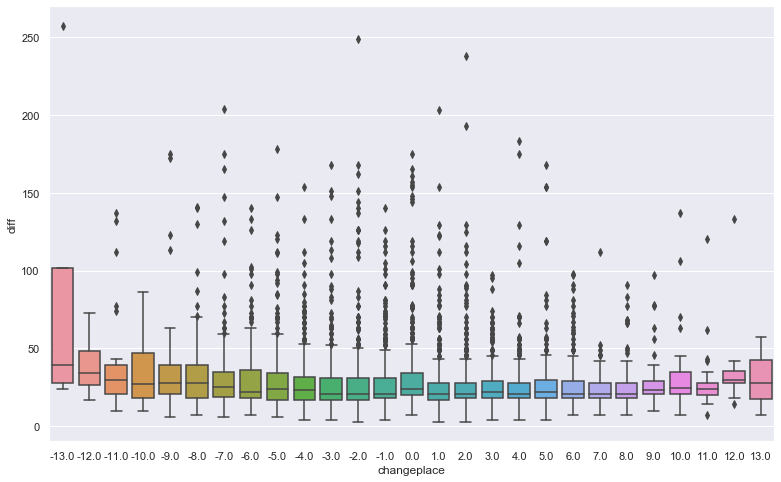

In [189]:
result = sns.boxplot(data=res,y='diff',x='changeplace')

In [176]:
def difference(x):
    if x <10:
        return '1-10'
    elif x<20:
        return '11-20'
    elif x<30:
        return '21-30'
    elif x<40:
        return '31-40'
    elif x<50:
        return '41-50'
    else:
        return 'over 50'

In [177]:
res['datedifference'] = res['diff'].apply(difference)

/Users/eddylam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


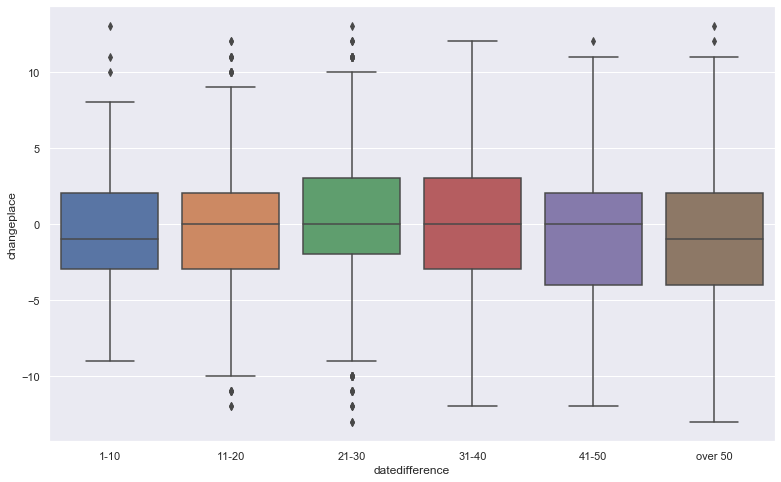

In [178]:
sns.boxplot(data=res,y='changeplace',x='datedifference', order=["1-10", "11-20", "21-30",'31-40','41-50','over 50'])

In [179]:
res['diff'].mean()

27.692525734745637

In [69]:
import statsmodels.formula.api as smf

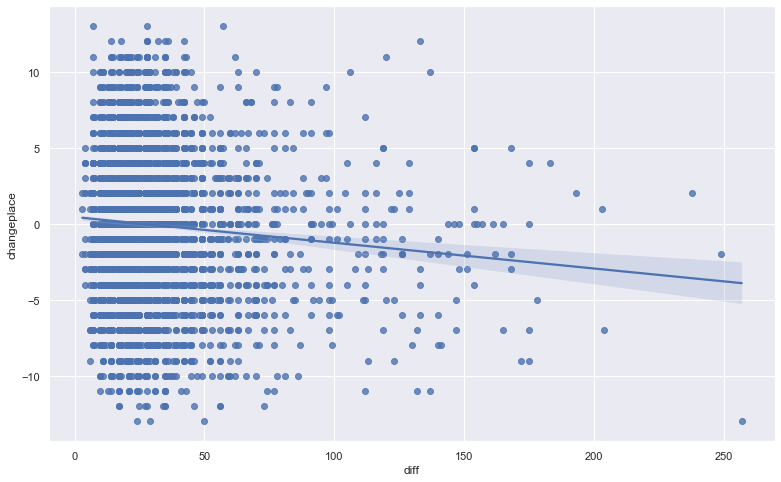

In [190]:
p = sns.regplot(x = res['diff'] , y = res['changeplace'])

In [191]:
results = smf.ols('diff ~ changeplace ' , data=  res).fit()

In [192]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   diff   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     41.38
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.34e-10
Time:                        01:08:47   Log-Likelihood:                -29430.
No. Observations:                6703   AIC:                         5.886e+04
Df Residuals:                    6701   BIC:                         5.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.6856      0.239    116.077      0.000      27.218      28.153
changeplace    -0.3626      0.056     -6.433      0.000      -0.473      -0.252
==============================================================================
Omnibus:                     5602.686   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169878.463
Skew:                           3.909   Prob(JB):                         0.00
Kurtosis:                      26.391   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

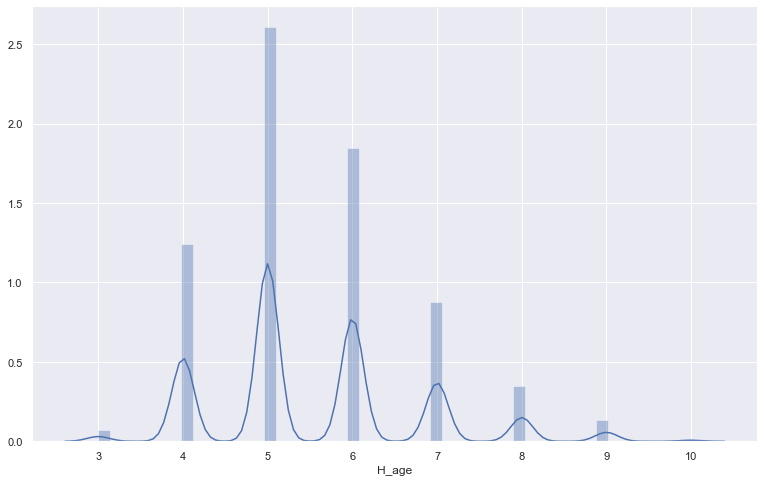

In [182]:
sns.distplot(df.H_age)

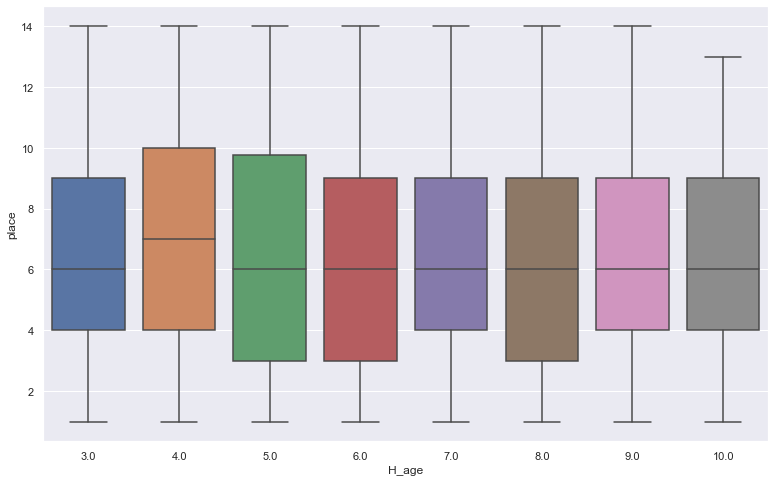

In [183]:
sns.boxplot(data=df, y='place',x='H_age')

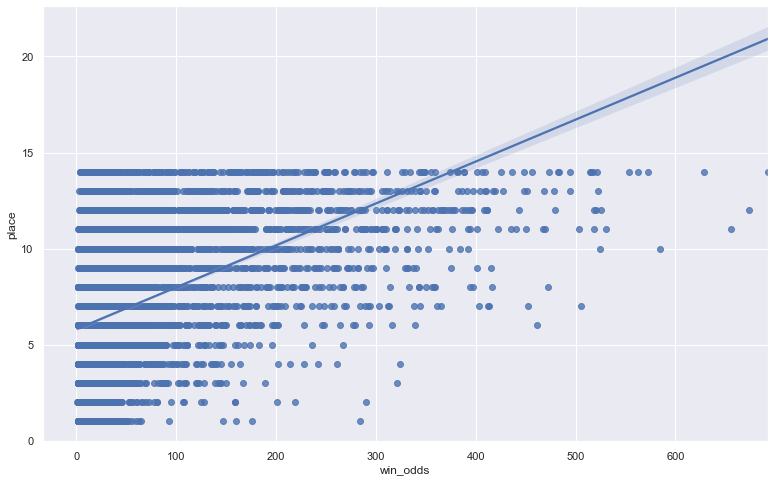

In [185]:
q = sns.regplot(y = df['place'] , x = df['win_odds'])

In [186]:
results2 = smf.ols('place ~ win_odds ' , data=  res).fit()

In [187]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  place   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     1391.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          8.83e-277
Time:                        01:03:45   Log-Likelihood:                -17614.
No. Observations:                6703   AIC:                         3.523e+04
Df Residuals:                    6701   BIC:                         3.525e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5566      0.047    118.206      0.000       5.464       5.649
win_odds       0.0210      0.001     37.293      0.000       0.020       0.022
==============================================================================
Omnibus:                      765.575   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.673
Skew:                           0.260   Prob(JB):                     3.74e-60
Kurtosis:                       2.158   Cond. No.                         95.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 40)

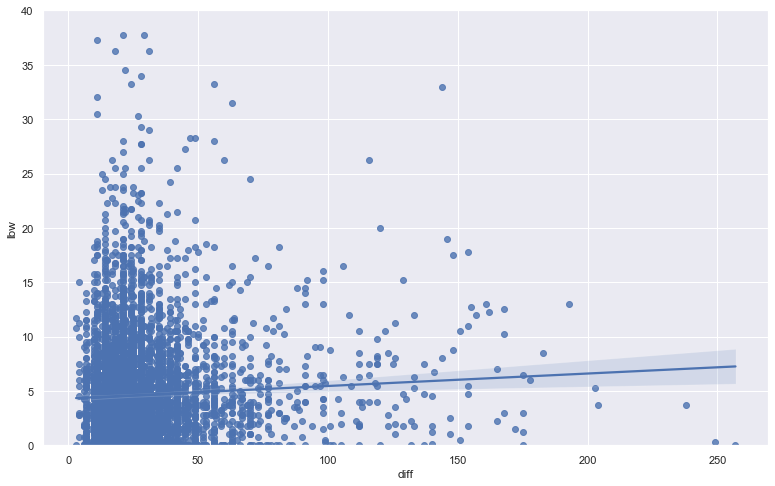

In [194]:
p = sns.regplot(x = res['diff'] , y = res['lbw'])
plt.ylim(0, 40)